# Exploratory Data Analysis: US Transportation
## Authors: Yasmine Thandi, Kyle Truong, Bin Xu
**Original Dataset Source: Monthly Transportation Statistics (Updated 2024). Kaggle Data Science Platform. https://www.kaggle.com/datasets/utkarshx27/monthly-transportation-statistics/data**

**Modified Dataset: https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv**

## Transportation Dataset Description
From the original dataset, any data prior to 1967 was removed, due to there being an insufficient amount of data recorded by The Bureau of Transportation Statistics.

We believe that most of the data provided to us is excessive and isn't required for the task we want to focus on. Therefore we reduced our 136 unique attributes to 26 that we thought were useful for our model.
### Attributes Used:
1. **Date** - The date the data was recorded (Typically the first day of each month at 12:00AM)
1. **Transit Ridership - Other Transit Modes - Adjusted** - Total number of riders on other transit modes.
1. **Transit Ridership - Fixed Route Bus - Adjusted** - Total number of riders on any bus routes.
1. **Transit Ridership - Urban Rail - Adjusted** - Total number of riders on any methods of urban rail (i.e. Subway, Local Trains, etc.)
1. **Freight Rail Intermodal Units** - Number of freight cars used per month.
1. **Freight Rail Carloads** - Number of freight cars with cargo loaded per month.
1. **Highway Vehicle Miles Traveled - All Systems** - Total combined miles travelled on a highway.
1. **Highway Fuel Price - Regular Gasoline** - Price of regular gasoline per gallon.
1. **Highway Fuel Price - On-highway Diesel** - Price of diesel per gallon.
1. **Personal Spending on Transportation - Transportation Services - Seasonally Adjusted** - Average monthly cost on transportation.
1. **Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted** - Average monthly on gasoline, diesel or electricity.
1. **Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted** - Average monthly spending on autoshops, repair parts and services.
1. **Passenger Rail Passengers** - Number of passengers who use the trains every month
1. **Transportation Services Index - Freight** - Month to month performance output measure of freight services
1. **Transportation Services Index - Passenger** - Month to month performance output measure of passenger services
1. **Real Gross Domestic Product - Seasonally Adjusted** - Monetary value of all transportation services
1. **U.S.-Canada Incoming Person Crossings** - Number of people entering the United States from Canada
1. **U.S.-Canada Incoming Truck Crossings** - Number of trucks entering the United States from Canada
1. **U.S.-Mexico Incoming Person Crossings** - Number of people entering the United States from Mexico
1. **U.S.-Mexico Incoming Truck Crossings** - Number of trucks entering the United States from Mexico
1. **U.S. Airline Traffic - Domestic - Non Seasonally Adjusted** - Amount of airline traffic travelling within the United States
1. **U.S. Airline Traffic - Total - Non Seasonally Adjusted** - Amount of airline traffic travelling collectively involving the United States
1. **U.S. Airline Traffic - International - Non Seasonally Adjusted** - Amount of airline traffic travelling in and out of the United States
1. **Transborder - Total North American Freight** - Total freight travelled across North America
1. **Transborder - U.S. - Mexico Freight** - Total freight travelled across the US-Mexico border into the United States
1. **Transborder - U.S. - Canada Freight** - Total freight travelled across the US-Canada border into the United States





# 1- Look at the big picture

### Frame the problem
1. Supervised learning.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No need to continuously adjust any incoming data because the last data recorded was in December, 2023

### Look at the big picture
Predictions will be used to inform operators in the US about future transportation metrics by using previous data on border crossings, ridership count, freight values, prices and revenue. We will be predicting the future cost of transportation and the future size of ridership. This will help with resource allocation, and predicting the future demand of transportation services for the operators. By understanding the relationship between the demand and revenue in the data set, we will provide a suitable budget as a future reference to operators to assist with optimizing pricing strategies for transportation services. 

In [47]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

In [48]:
url = "https://raw.githubusercontent.com/HenryCROSS/eecs3401_final_project/main/data/Monthly_Transportation_Statistics.csv"
data = pd.read_csv(url, sep=',')
data_bak = data

In [49]:
data

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,919,08/01/2023 12:00:00 AM,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,544000.0,NaN,12196000.0,NaN,3099000.0,NaN,NaN,NaN,0.8,NaN
920,920,09/01/2023 12:00:00 AM,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,501000.0,NaN,12438000.0,NaN,3220000.0,NaN,NaN,NaN,0.8,NaN
921,921,10/01/2023 12:00:00 AM,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,451000.0,NaN,12408000.0,NaN,3038000.0,NaN,NaN,NaN,NaN,NaN
922,922,11/01/2023 12:00:00 AM,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,478000.0,NaN,12329000.0,NaN,2991000.0,NaN,NaN,NaN,NaN,NaN


## Task 2.1
We decided at this point in time to reduce the number of attributes in our dataset, as we believe it would help optimize our workflow moving forwards. As mentioned above, these points of data were selected because we believe that they would be useful to our algorithm.

In [52]:
tokeep = ["Date", "Transit Ridership - Other Transit Modes - Adjusted", "Transit Ridership - Fixed Route Bus - Adjusted", "Transit Ridership - Urban Rail - Adjusted", "Freight Rail Intermodal Units", "Freight Rail Carloads", "Highway Vehicle Miles Traveled - All Systems", "Highway Fuel Price - Regular Gasoline", 
          "Highway Fuel Price - On-highway Diesel", "Personal Spending on Transportation - Transportation Services - Seasonally Adjusted", "Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted", "Personal Spending on Transportation - Motor Vehicles and Parts - Seasonally Adjusted",
          "Passenger Rail Passengers", "Transportation Services Index - Freight", "Transportation Services Index - Passenger", "Real Gross Domestic Product - Seasonally Adjusted", "U.S.-Canada Incoming Person Crossings", "U.S.-Canada Incoming Truck Crossings", "U.S.-Mexico Incoming Person Crossings", 
          "U.S.-Mexico Incoming Truck Crossings", "U.S. Airline Traffic - Domestic - Non Seasonally Adjusted", "U.S. Airline Traffic - Total - Non Seasonally Adjusted", "U.S. Airline Traffic - International - Non Seasonally Adjusted", "Transborder - Total North American Freight", "Transborder - U.S. - Mexico Freight","Transborder - U.S. - Canada Freight"]
data = data[tokeep]
# data.dropna(axis=0, inplace=True)

In [55]:
data.head(20)

,Date,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,Freight Rail Intermodal Units,Freight Rail Carloads,Highway Vehicle Miles Traveled - All Systems,Highway Fuel Price - Regular Gasoline,Highway Fuel Price - On-highway Diesel,Personal Spending on Transportation - Transportation Services - Seasonally Adjusted,...,U.S.-Canada Incoming Person Crossings,U.S.-Canada Incoming Truck Crossings,U.S.-Mexico Incoming Person Crossings,U.S.-Mexico Incoming Truck Crossings,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
852,01/01/2018 12:00:00 AM,16028440.0,369920847.0,381378921.0,1310160.0,1217433.0,2.447360e+11,2.555,3.018,4.507730e+11,...,12571.0,475119.0,3731985.0,517144.0,55830000.0,64430000.0,8600000.0,9.664831e+10,4.774127e+10,4.890704e+10
855,04/01/2018 12:00:00 AM,17566326.0,392252372.0,398115089.0,1099000.0,1051026.0,2.751270e+11,2.757,3.096,4.484870e+11,...,22471.0,501741.0,3860744.0,542965.0,64560000.0,73630000.0,9070000.0,1.026997e+11,5.051882e+10,5.218090e+10
858,07/01/2018 12:00:00 AM,20067600.0,362119816.0,394287833.0,1399211.0,1328506.0,2.909890e+11,2.849,3.233,4.447580e+11,...,80348.0,482545.0,3916503.0,514241.0,72540000.0,83960000.0,11420000.0,1.012118e+11,5.093911e+10,5.027265e+10
861,10/01/2018 12:00:00 AM,19367600.0,437208668.0,443479335.0,1443854.0,1337180.0,2.813820e+11,2.860,3.365,4.444250e+11,...,51076.0,527247.0,3896888.0,568252.0,67080000.0,75510000.0,8420000.0,1.107956e+11,5.658084e+10,5.421476e+10
864,01/01/2019 12:00:00 AM,16515635.0,367851089.0,368022820.0,1316168.0,1238487.0,2.465170e+11,2.248,2.980,4.515260e+11,...,14412.0,467770.0,3894421.0,544903.0,58030000.0,67020000.0,8980000.0,9.562308e+10,4.959533e+10,4.602775e+10
867,04/01/2019 12:00:00 AM,18746430.0,397479345.0,415533810.0,1322588.0,1310228.0,2.769760e+11,2.798,3.121,4.599240e+11,...,31204.0,480477.0,4256803.0,524215.0,66940000.0,76430000.0,9490000.0,1.045488e+11,5.259620e+10,5.195258e+10
870,07/01/2019 12:00:00 AM,20378395.0,369257081.0,411609150.0,1314363.0,1264354.0,2.926800e+11,2.740,3.045,4.669800e+11,...,87714.0,478767.0,4343673.0,552492.0,75280000.0,86960000.0,11670000.0,1.024414e+11,5.222079e+10,5.022060e+10
873,10/01/2019 12:00:00 AM,19083744.0,426327140.0,448819797.0,1063908.0,977406.0,2.829720e+11,2.627,3.053,4.677890e+11,...,46365.0,501929.0,4141103.0,574078.0,69920000.0,78620000.0,8690000.0,1.071120e+11,5.335177e+10,5.376023e+10
876,01/01/2020 12:00:00 AM,16883290.0,375738346.0,406474497.0,1046672.0,950102.0,2.608470e+11,2.548,3.048,4.287110e+11,...,10927.0,457339.0,4099096.0,544303.0,61620000.0,70780000.0,9160000.0,9.709232e+10,4.916571e+10,4.792660e+10
879,04/01/2020 12:00:00 AM,4303718.0,111044589.0,42951341.0,877194.0,769780.0,1.676170e+11,1.841,2.493,2.873200e+11,...,555.0,316002.0,916801.0,402091.0,2880000.0,3010000.0,140000.0,5.812297e+10,2.835669e+10,2.976629e+10


Here we use the describe() method to see a summary of the numerical attributes.

In [27]:
data.describe()

,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,Freight Rail Intermodal Units,Freight Rail Carloads,Highway Vehicle Miles Traveled - All Systems,Highway Fuel Price - Regular Gasoline,Highway Fuel Price - On-highway Diesel,Personal Spending on Transportation - Transportation Services - Seasonally Adjusted,Personal Spending on Transportation - Gasoline and Other Energy Goods - Seasonally Adjusted,...,U.S.-Canada Incoming Person Crossings,U.S.-Canada Incoming Truck Crossings,U.S.-Mexico Incoming Person Crossings,U.S.-Mexico Incoming Truck Crossings,U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,U.S. Airline Traffic - Total - Non Seasonally Adjusted,U.S. Airline Traffic - International - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
count,2.520000e+02,2.520000e+02,2.520000e+02,4.180000e+02,4.180000e+02,5.000000e+01,388.000000,347.000000,8.700000e+01,8.700000e+01,...,318.000000,335.000000,3.350000e+02,335.000000,6.700000e+01,6.700000e+01,6.700000e+01,2.030000e+02,2.030000e+02,2.030000e+02
mean,1.479240e+07,3.964658e+08,3.433674e+08,8.854064e+05,1.268048e+06,2.621634e+11,2.162191,2.502715,3.840297e+11,3.421180e+11,...,42729.393082,501483.149254,3.562096e+06,428533.892537,5.521582e+07,6.247284e+07,7.257015e+06,9.118179e+10,4.188672e+10,4.929506e+10
std,3.016048e+06,8.023240e+07,8.191928e+07,2.518891e+05,2.048881e+05,2.519119e+10,0.934098,1.110270,4.783771e+10,6.427849e+10,...,34099.439817,58618.974341,6.105487e+05,90815.299348,1.736053e+07,2.030572e+07,3.087197e+06,1.692174e+10,1.074877e+10,7.156351e+09
min,4.303718e+06,1.110446e+08,4.295134e+07,4.076090e+05,7.397330e+05,1.676170e+11,0.921000,0.959000,2.873200e+11,2.454140e+11,...,555.000000,316002.000000,9.168010e+05,241608.000000,2.880000e+06,3.010000e+06,1.400000e+05,5.426452e+10,2.164871e+10,2.976629e+10
25%,1.264651e+07,3.921185e+08,2.998691e+08,6.801630e+05,1.137315e+06,2.451812e+11,1.223250,1.420500,3.472350e+11,3.024230e+11,...,19602.750000,460903.000000,3.282252e+06,362223.500000,5.332500e+07,5.822000e+07,5.545000e+06,8.034844e+10,3.254186e+10,4.554671e+10
50%,1.520069e+07,4.183203e+08,3.722867e+08,9.025320e+05,1.260416e+06,2.680845e+11,2.180000,2.519000,3.654330e+11,3.167700e+11,...,33469.000000,493212.000000,3.592350e+06,408367.000000,6.128000e+07,7.034000e+07,8.600000e+06,9.227839e+10,4.301536e+10,4.890704e+10
75%,1.700526e+07,4.428878e+08,4.011837e+08,1.065960e+06,1.385619e+06,2.828910e+11,2.848250,3.238000,4.210860e+11,3.250300e+11,...,55661.500000,536325.500000,3.919972e+06,486059.000000,6.669000e+07,7.464000e+07,9.125000e+06,9.995265e+10,4.859893e+10,5.308561e+10
max,2.069144e+07,5.155401e+08,4.547436e+08,1.443854e+06,1.704628e+06,2.964750e+11,4.929000,5.754000,4.724910e+11,4.632940e+11,...,215313.000000,636750.000000,4.999418e+06,672503.000000,7.528000e+07,8.696000e+07,1.167000e+07,1.418502e+11,7.029840e+10,7.334734e+10


Here, we implement the info() function to get a description of our data, and the number of non-null attributes. There are no missing values. However, we have decided to remove the.... attributes because....

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 26 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Date                                                                                         924 non-null    object 
 1   Transit Ridership - Other Transit Modes - Adjusted                                           252 non-null    float64
 2   Transit Ridership - Fixed Route Bus - Adjusted                                               252 non-null    float64
 3   Transit Ridership - Urban Rail - Adjusted                                                    252 non-null    float64
 4   Freight Rail Intermodal Units                                                                418 non-null    float64
 5   Freight Rail Carloads               

**Missing values:**
- Highway...

# 3. Explore and visualize the data to gain insights.

We have decided to create custom heading titles to make the following graphs in our data visualization more readable. Here is the key to the following acronyms of the attribute names:

- TR = Transit Ridership, FR = Freight Rail, H = Highway, V = Vehicle, F = Fuel, P = Price, PST = Personal Spending on Transportation, TSI = Transportation Sevices Index, Pass = Passenger, PC = Person Crossings, TC = Truck Crossings, Mex = Mexico, AT = Airline Traffic, TB = Transborder
- AS = All Systems, A = Adjusted, SA = Seasonally Adjusted, NSA = Non Seasonally Adjusted

In [20]:


import pandas as pd

# Custom headers
custom_headers = [
    "Date",
    "TROtherTransit(A)",
    "TRFixedRouteBus(A)",
    "TRUrbanRail(A)",
    "FRIntermodalUnits",
    "FRCarloads",
    "HVMiles(AS)",
    "HFP-RegGas",
    "HFP-HDiesel",
    "PST-TransServ(SA)",
    "PST-EnergyGoods(SA)",
    "PST-AutoServ(SA)",
    "PassRailPass",
    "TSI-Freight",
    "TSI-Pass",
    "RealGDP(SA)",
    "US-CA PC",
    "US-CA TC",
    "US-Mex PC",
    "US-Mex TC",
    "US AT - Domestic(NSA)",
    "US AT - Total(NSA)",
    "US AT - International(NSA)",
    "TB - TotalFreight",
    "TB - US-MexFreight",
    "TB - US-CAFreight"
]

data = pd.read_csv(url, usecols=tokeep)
data.columns = custom_headers
print(data.head(1000))

                       Date  TROtherTransit(A)  TRFixedRouteBus(A)  \
0    01/01/1947 12:00:00 AM                NaN                 NaN   
1    02/01/1947 12:00:00 AM                NaN                 NaN   
2    03/01/1947 12:00:00 AM                NaN                 NaN   
3    04/01/1947 12:00:00 AM                NaN                 NaN   
4    05/01/1947 12:00:00 AM                NaN                 NaN   
..                      ...                ...                 ...   
919  08/01/2023 12:00:00 AM                NaN                 NaN   
920  09/01/2023 12:00:00 AM                NaN                 NaN   
921  10/01/2023 12:00:00 AM                NaN                 NaN   
922  11/01/2023 12:00:00 AM                NaN                 NaN   
923  12/01/2023 12:00:00 AM                NaN                 NaN   

     TRUrbanRail(A)  FRIntermodalUnits  FRCarloads  HVMiles(AS)  HFP-RegGas  \
0               NaN                NaN         NaN          NaN         NaN   
1

## 3.1 Plot a histogram of the data using hist()

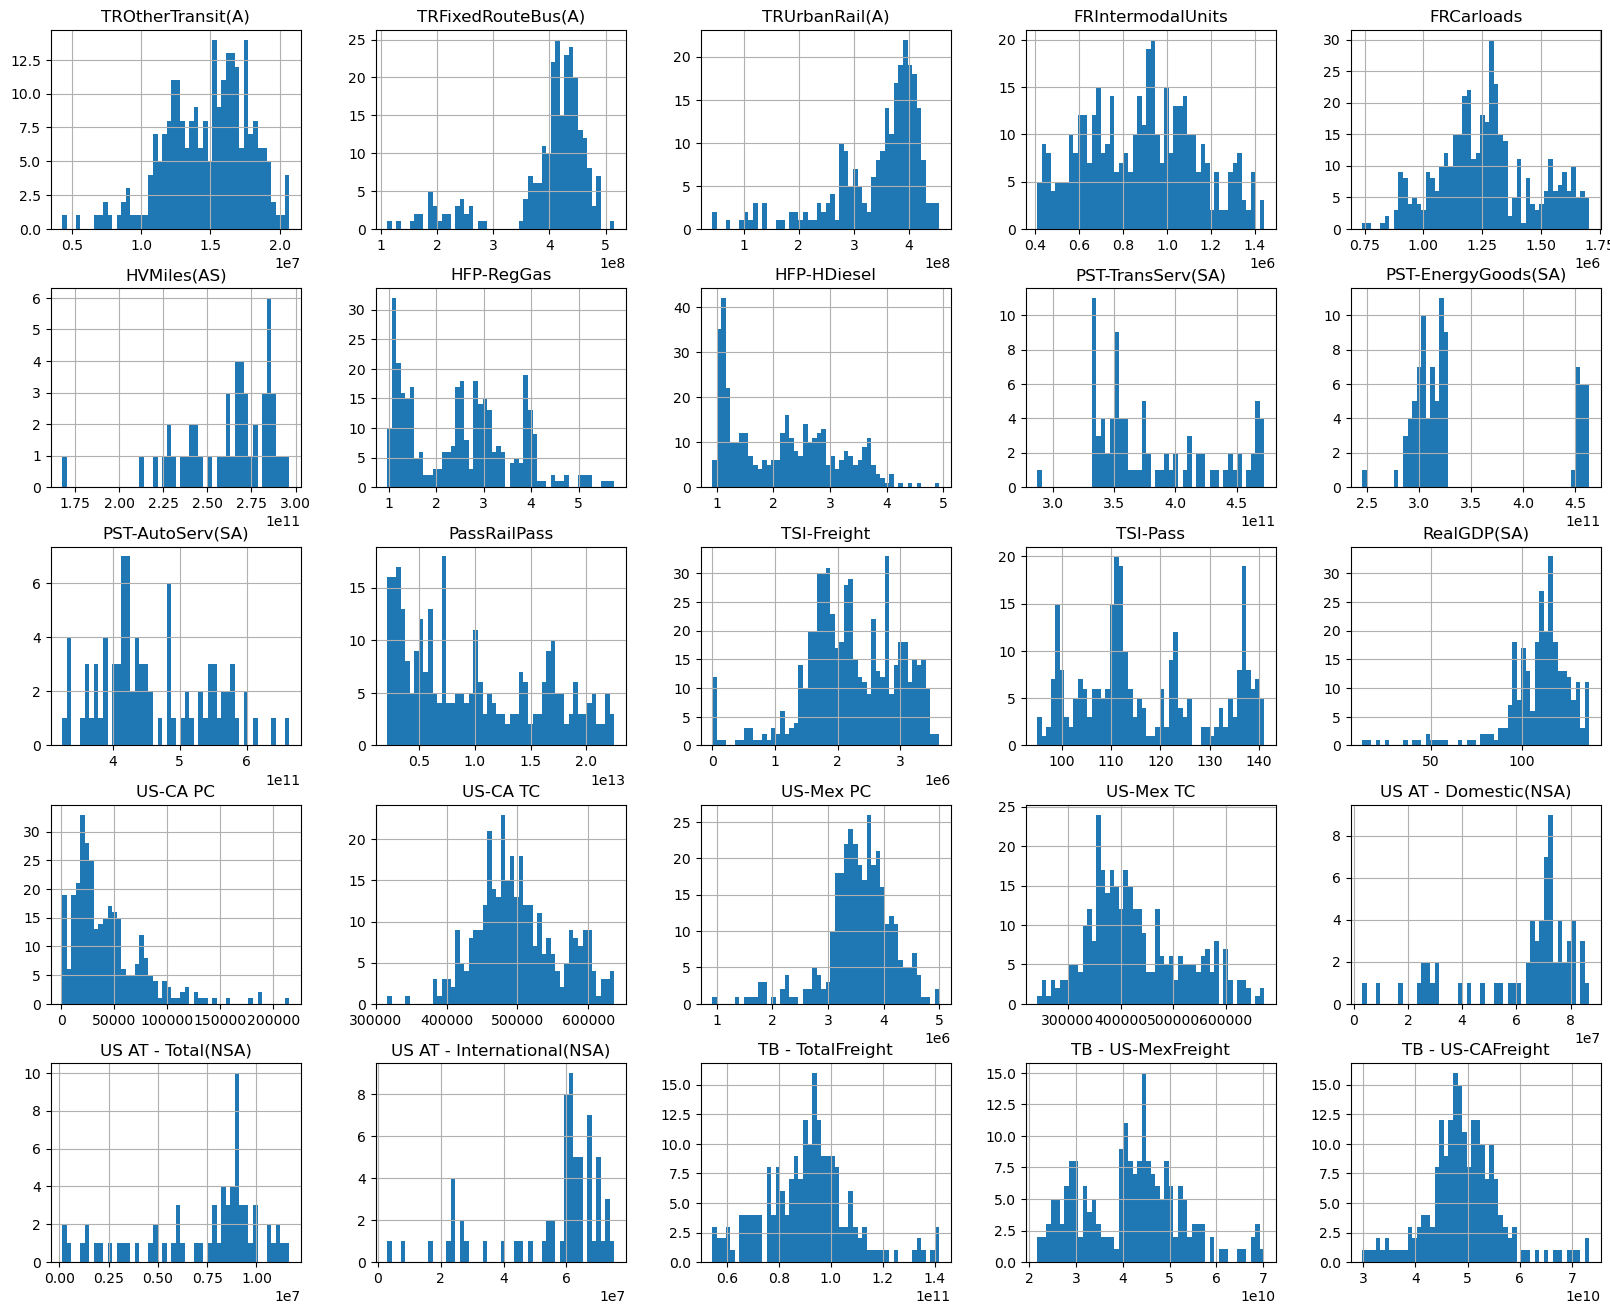

In [21]:
data.hist(bins=50, figsize=(20, 16))

plt.show()